## Gender indicators in SG - trends
#### This notebook investigates how indicators for the two genders vary over the years
#### Data sets:
1) Key Indicators On Gender, Annual : Literacy Rate, Combined Gross Enrolment Ratio and Key Labour Force Indicators by Sex.
URL: [https://data.gov.sg/dataset/key-indicators-on-gender-annual](https://data.gov.sg/dataset/key-indicators-on-gender-annual) 
    
2) Mean Years of Schooling & Median Age At First Marriage by Sex.
URL: [https://data.gov.sg/dataset/key-indicators-on-gender-annual](https://data.gov.sg/dataset/key-indicators-on-gender-annual) 

3) Combined And Gross Enrolment Ratio For Primary, Secondary & Tertiary Education.
URL: [https://data.gov.sg/dataset/combined-and-gross-enrolment-ratio-for-primary-secondary-tertiary-education](https://data.gov.sg/dataset/combined-and-gross-enrolment-ratio-for-primary-secondary-tertiary-education)  
    
4) Resident Labour Force Aged 15 Years and Over by Highest Qualification Attained and Sex.
URL: [https://data.gov.sg/dataset/resident-labour-force-aged-15-years-and-over-by-highest-qualification-attained-and-sex](https://data.gov.sg/dataset/resident-labour-force-aged-15-years-and-over-by-highest-qualification-attained-and-sex)  

5) Residents Outside the Labour Force by Highest Qualification Attained, Age and Sex.
URL: [https://data.gov.sg/dataset/residents-outside-the-labour-force-by-highest-qualification-attained-age-and-sex](https://data.gov.sg/dataset/residents-outside-the-labour-force-by-highest-qualification-attained-age-and-sex)   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from textwrap import wrap
import os

#set plot aesthetics
rcParams['axes.titlesize'] = 18
rcParams['axes.titlepad'] = 15
rcParams['axes.labelsize'] = 14
rcParams['axes.labelpad'] = 10
rcParams["figure.titlesize"] = 18

%matplotlib inline

In [2]:
#load all csv files
file1 = "data/literacy-rate-combined-gross-enrolment-ratio-and-key-labour-force-indicators-by-sex.csv"
file2 = "data/mean-years-of-schooling-median-age-at-first-marriage-by-sex.csv"
file3 = "data/combined-and-gross-enrolment-ratio-for-primary-secondary-tertiary-education.csv"
file4 = "data/resident-labour-force-aged-15-years-and-over-by-highest-qualification-attained-and-sex.csv"
file5 = "data/residents-outside-the-labour-force-by-highest-qualification-attained-age-and-sex.csv"

data1, data2, data3, data4, data5 = [pd.read_csv(file) for file in [file1,file2,file3,file4,file5]] #read the csv files


### Data exploration and transformation

In [3]:
#get preliminary info on data sets
for i,data in enumerate([data1, data2, data3, data4, data5]):
    print("data{}:".format(i+1))
    print(data.info())
    print()

data1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
year       220 non-null int64
level_1    220 non-null object
value      220 non-null object
dtypes: int64(1), object(2)
memory usage: 5.2+ KB
None

data2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
year       88 non-null int64
level_1    88 non-null object
value      88 non-null object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
None

data3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
year                     324 non-null int64
category                 324 non-null object
level_of_education       324 non-null object
sex                      324 non-null object
gross_enrolment_ratio    324 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.7+ KB
None

data4:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Dat

In [4]:
for i,data in enumerate([data1, data2, data3, data4, data5]):
    print("data{}:".format(i+1))
    print("Min year: {}".format(data['year'].min()))
    print("Max year: {}".format(data['year'].max()))


data1:
Min year: 1970
Max year: 2017
data2:
Min year: 1970
Max year: 2017
data3:
Min year: 1990
Max year: 2016
data4:
Min year: 1991
Max year: 2015
data5:
Min year: 2010
Max year: 2015


In [5]:
data1.head()
data1['level_1'].unique()

data2.head()
data2['level_1'].unique()

array(['Mean Years Of Schooling (25 Years & Over)  - Males',
       'Mean Years Of Schooling (25 Years & Over) - Females',
       'Median Age At First Marriage - Males',
       'Median Age At First Marriage - Females'], dtype=object)

In [6]:
# concatenate data 1, 2 as they are of the same form 
data12 = pd.concat([data1,data2], axis=0)

#split level_1 into 2 columns for variable and gender to facilitate plotting
data12['gender'] = data12['level_1'].apply(lambda x:x.split('-')[1].strip())
data12['level_1'] = data12['level_1'].apply(lambda x:x.split('-')[0].strip())

#set values as numeric
data12['value']=pd.to_numeric(data12['value'], errors = 'coerce')

#rename long variable names
data12['level_1']=data12['level_1'].apply(lambda x: x.replace("Professionals, Managers, Executives & Technicians","PMETs"))

print("data1 & data2:\n")
data12.head()

data1 & data2:



,year,level_1,value,gender
0,1970,Literacy Rate (15 Years & Over),83.0,Males
1,1970,Literacy Rate (15 Years & Over),54.3,Females
2,1970,Combined Gross Enrolment Ratio,68.5,Males
3,1970,Combined Gross Enrolment Ratio,62.6,Females
4,1970,Resident Labour Force Participation Rate (15 Y...,81.2,Males


In [7]:
print("data3:\n")
data3.head()

data3:



,year,category,level_of_education,sex,gross_enrolment_ratio
0,1990,COMBINED GROSS ENROLMENT RATIO,ALL LEVELS,MF,79.8
1,1990,COMBINED GROSS ENROLMENT RATIO,ALL LEVELS,M,81.0
2,1990,COMBINED GROSS ENROLMENT RATIO,ALL LEVELS,F,78.4
3,1990,GROSS ENROLMENT RATIO,PRIMARY EDUCATION,MF,102.5
4,1990,GROSS ENROLMENT RATIO,PRIMARY EDUCATION,M,103.6


In [8]:
# manipulate data3 to same format and naming convention as data12

data3 = data3[(data3['level_of_education']!="ALL LEVELS") & (data3['sex']!='MF')] #remove rows that give aggregated M/F data or aggregated education level data
data3.drop(labels='category', axis=1, inplace=True)
data3.columns = ['year','level_1','gender','value']
data3['level_1'] = data3['level_1'].apply(lambda x:"".join(['Gross Enrolment Ratio - ', x.title()]))  #rename level_1 entries to include "Gross Enrolment Ratio"
data3 = data3[['year','level_1','value','gender']] #reorder columns

def gender_func(x):
    if x == "M":
        return "Males"
    else:
        return "Females"

data3['gender']=data3['gender'].apply(lambda x: gender_func(x)) #rename gender values to be consistent with data12


In [9]:
print("data3 after transformation:\n")
data3.head()


data3 after transformation:



,year,level_1,value,gender
4,1990,Gross Enrolment Ratio - Primary Education,103.6,Males
5,1990,Gross Enrolment Ratio - Primary Education,101.2,Females
7,1990,Gross Enrolment Ratio - Secondary Education,93.4,Males
8,1990,Gross Enrolment Ratio - Secondary Education,96.8,Females
10,1990,Gross Enrolment Ratio - Tertiary Education,26.4,Males


In [10]:
print("data4:\n")
data4.head()

data4:



,year,sex,highest_qualification,labour_force
0,1991,males,primary and below,281200
1,1991,males,lower secondary,158800
2,1991,males,secondary,224400
3,1991,males,post-secondary (non-tertiary),76000
4,1991,males,diploma and professional qualification,58300


In [11]:
print("data5:\n")
data5.head()

data5:



,year,sex,highest_qualification,age,outside_labour_force
0,2010,males,primary and below,15-19,4900
1,2010,males,primary and below,20-24,600
2,2010,males,primary and below,25-29,400
3,2010,males,primary and below,30-34,700
4,2010,males,primary and below,35-39,700


In [12]:
#Get total number outside labour force for each gender and qualification by aggregating age groups so that in same form as data4
data5['outside_labour_force'] = pd.to_numeric(data5['outside_labour_force'], errors='coerce')
data5 = data5.groupby(by=['year','sex','highest_qualification'])['outside_labour_force'].sum().reset_index()

#merge data4 and data5
data45 = data5.merge(data4, on=['year','sex','highest_qualification'], how='inner')

#create new column showing percentage of each qualification-gender group in labour force
data45['total']=data45['outside_labour_force']+data45['labour_force']
data45['percent in labour force']=data45['labour_force']*100/data45['total']


In [13]:
#create new column showing percentage of residents attaining that qualification for each gender and year

total_by_gender_year = data45.groupby(by=['year','sex'])['total'].sum().reset_index()  #get total number of males and females for each year
data45_transformed = data45.merge(total_by_gender_year, on=['year','sex'], how='left')
data45_transformed ['percentage_attained'] = data45_transformed ['total_x']*100/data45_transformed ['total_y']

#create new dataframes to merge with data1-3
percent_attained_qual = data45_transformed [['year','highest_qualification','percentage_attained','sex']]
percent_in_LF = data45_transformed [['year','highest_qualification','percent in labour force','sex']]

#rename values for clarity
percent_attained_qual['highest_qualification'] = percent_attained_qual['highest_qualification'].apply(lambda x: "Percentage with {} as highest qualification".format(x.title()))
percent_in_LF['highest_qualification'] = percent_in_LF['highest_qualification'].apply(lambda x: "Percentage of {} qualification holders in labour force".format(x.title()))

percent_attained_qual.columns = ['year','level_1','value', 'gender']
percent_in_LF.columns = ['year','level_1','value', 'gender']

/anaconda2/envs/pydot_p3_2/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda2/envs/pydot_p3_2/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [14]:
print("Combined data4 and 5 after transformation:\n")
print(percent_attained_qual.head())
print(percent_in_LF.head())

Combined data4 and 5 after transformation:

   year                                            level_1      value   gender
0  2010    Percentage with Degree as highest qualification  19.641957  females
1  2010  Percentage with Diploma And Professional Quali...  13.193394  females
2  2010  Percentage with Lower Secondary as highest qua...  11.258195  females
3  2010  Percentage with Post-Secondary (Non-Tertiary) ...   9.140192  females
4  2010  Percentage with Primary And Below as highest q...  23.890570  females
   year                                            level_1      value   gender
0  2010  Percentage of Degree qualification holders in ...  81.386393  females
1  2010  Percentage of Diploma And Professional Qualifi...  80.124224  females
2  2010  Percentage of Lower Secondary qualification ho...  39.977604  females
3  2010  Percentage of Post-Secondary (Non-Tertiary) qu...  63.448276  females
4  2010  Percentage of Primary And Below qualification ...  29.920844  females


In [15]:
#combine all data and transform/clean data to facilitate plotting order later
combined_data = pd.concat([data12, data3,percent_attained_qual,percent_in_LF], axis=0)
combined_data.columns = ['Year','Indicator', "Value","Gender"]
combined_data['Gender'] = combined_data['Gender'].apply(lambda x: x.title())
combined_data.sort_values(by=['Indicator','Year','Gender'], inplace=True)
combined_data.dropna(inplace=True, axis = 0) #drop rows where 'Value' is NaN
combined_data.reset_index(drop=True, inplace=True) #reset index to integer values

#exclude years before 2001 due to differences in data collection methodology
combined_data = combined_data[combined_data['Year']>=2001]

# exclude labor force indicator in year 2005 due to difference in data collection methodology
exclude_index = combined_data[(combined_data['Indicator']=='Resident Labour Force Participation Rate (15 Years & Over)') & (combined_data['Year']==2005)].index.values
combined_data.drop(index=exclude_index.tolist(), axis=0, inplace=True)

#reset index
combined_data.reset_index(inplace=True, drop=True)


In [16]:
print("Final data set:\n")
print(combined_data.info())

combined_data.head()

Final data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 4 columns):
Year         460 non-null int64
Indicator    460 non-null object
Value        460 non-null float64
Gender       460 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 14.5+ KB
None


,Year,Indicator,Value,Gender
0,2001,Combined Gross Enrolment Ratio,85.5,Females
1,2001,Combined Gross Enrolment Ratio,88.4,Males
2,2002,Combined Gross Enrolment Ratio,85.8,Females
3,2002,Combined Gross Enrolment Ratio,88.8,Males
4,2003,Combined Gross Enrolment Ratio,87.1,Females


### Plot trends

In [17]:
def trends_linechart(df, var_name):

    fig,ax = plt.subplots(figsize=(10,8))
    colors = ['#77B7D8', '#929791']
    
    genders = np.unique(df['Gender'])
            
    ylabel = '\n'.join(wrap(var_name,40))  #wrap text to fit ylabel to height of plot
    
    for i,gender in enumerate(genders):
        ax.plot(df['Year'][df['Gender']==gender],df['Value'][df['Gender']==gender], 
                linewidth=1.5, color = colors[i], marker='o',
                markerfacecolor='white',label=gender)

    #add labels
    ax.set_title("{} from {} to {}".format(var_name, df['Year'].min(), df['Year'].max()))
    ax.set_ylabel("{}".format(ylabel))
    ax.set_xlabel("Year")

    #add a grid
    ax.grid(color='#A5A7A5', linestyle=':', linewidth=0.3)
    
    plt.legend(fontsize=12)

    #generate a filename for the town being considered. replace illegal characters
    filename = "generatedplots/"+ var_name.replace(" ", "_") + "trend.png"

    #save plot and display
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()



In [18]:
#create folder for saving plots
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        
createFolder('./generatedplots/')

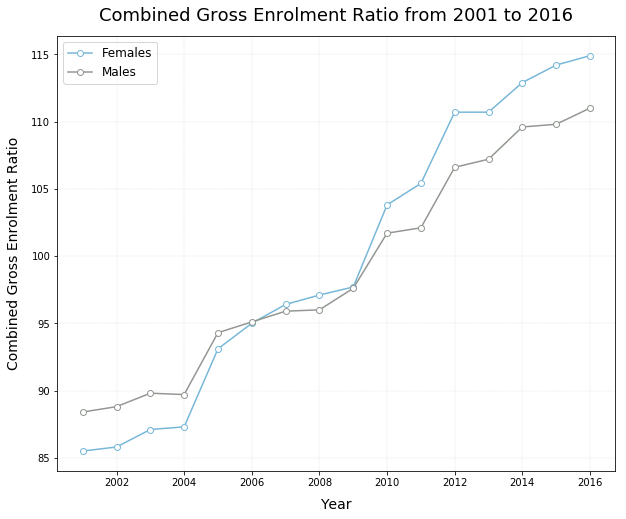

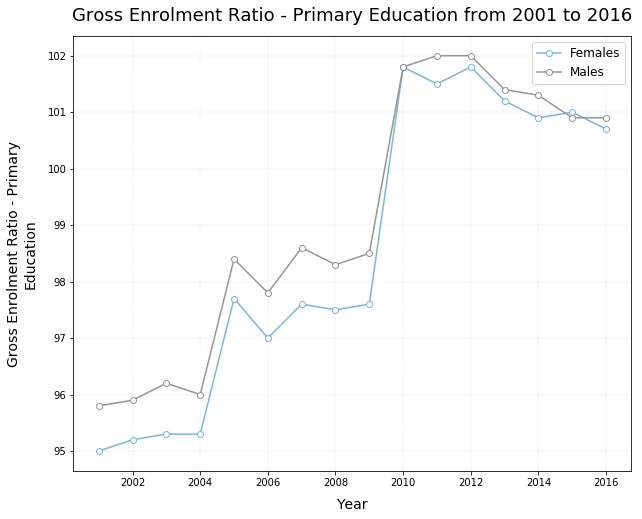

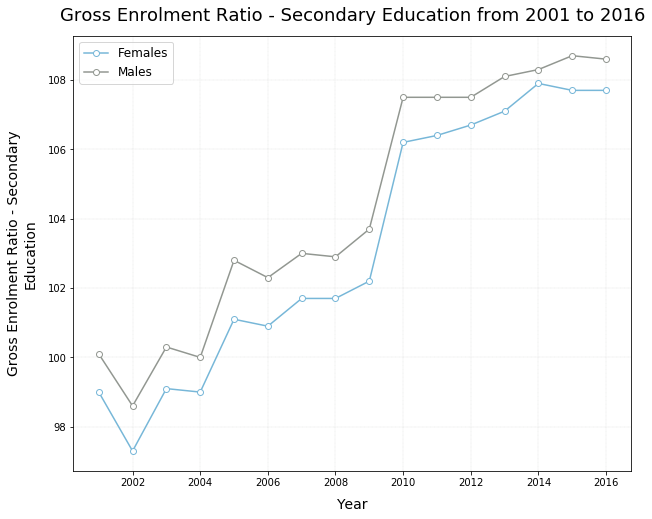

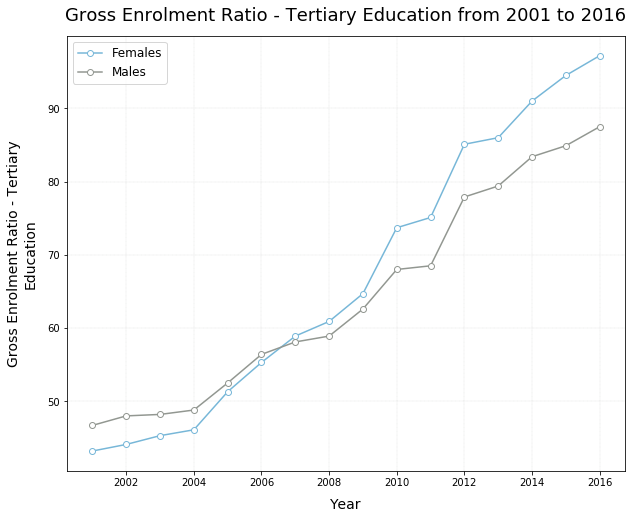

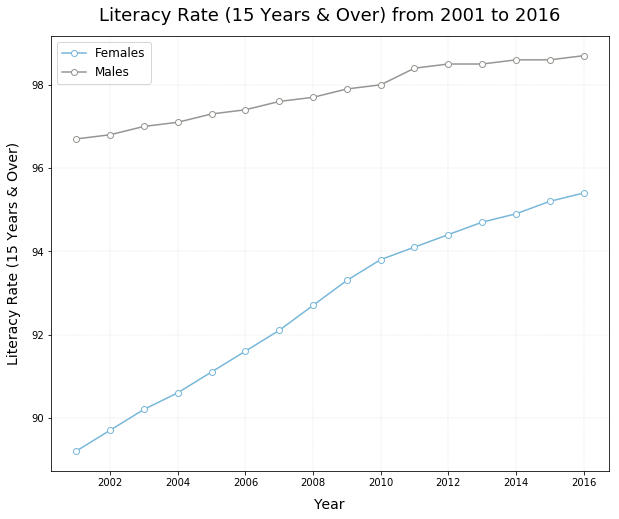

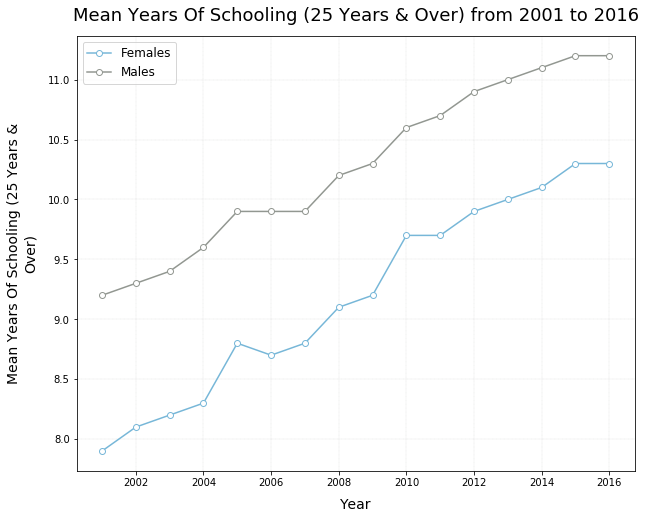

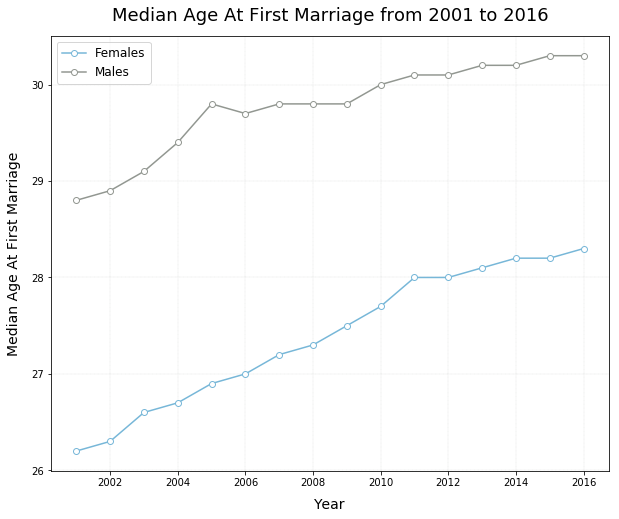

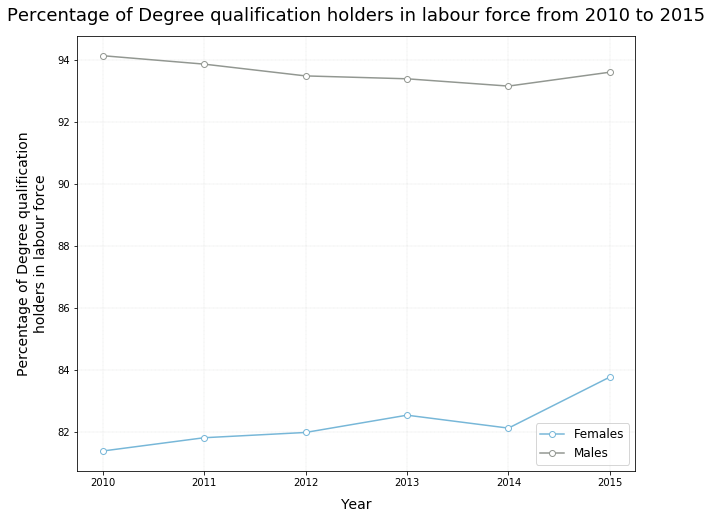

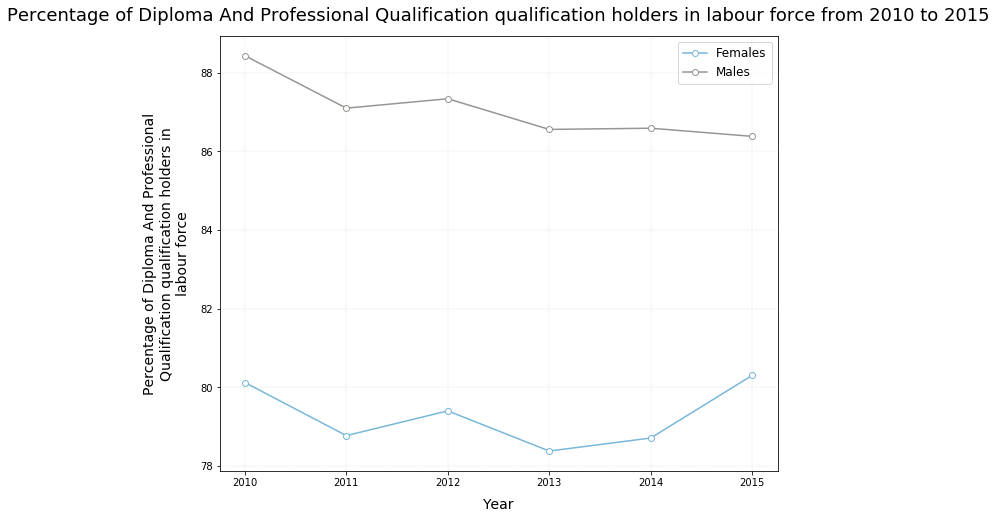

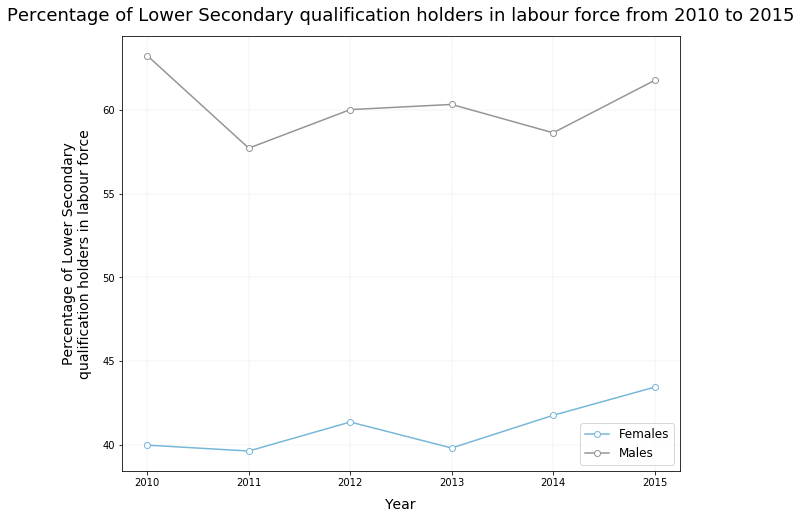

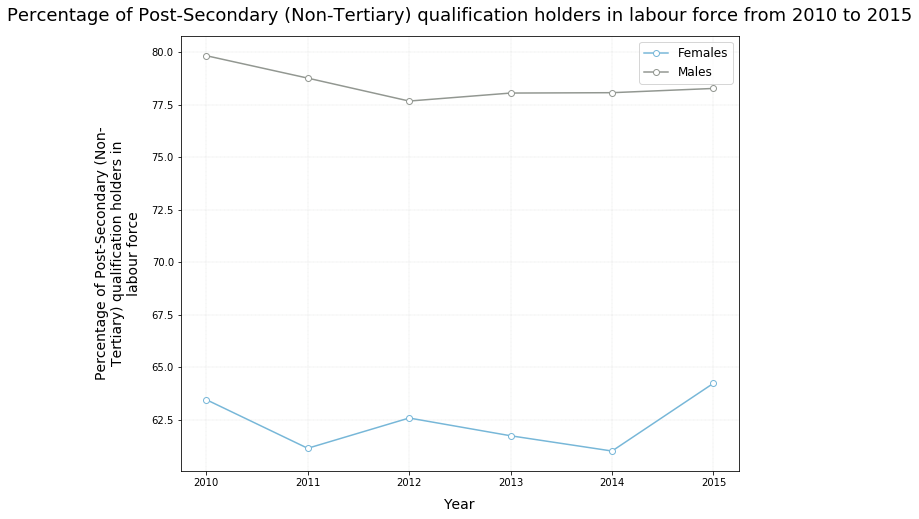

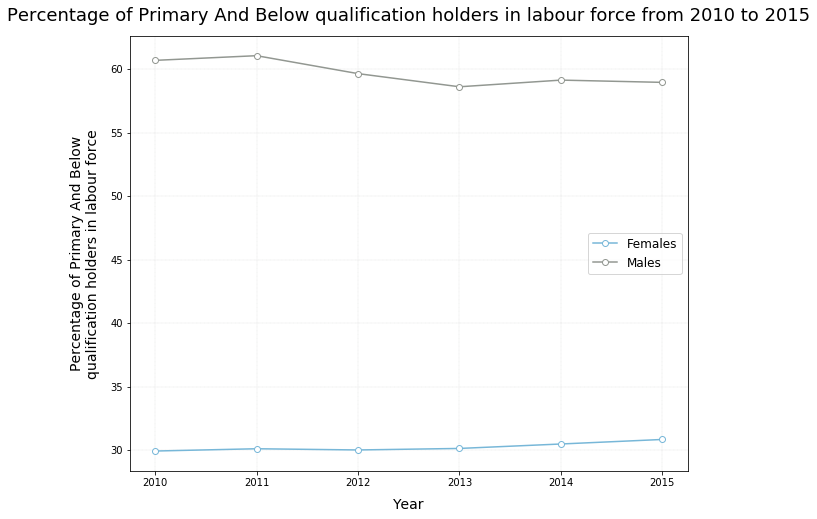

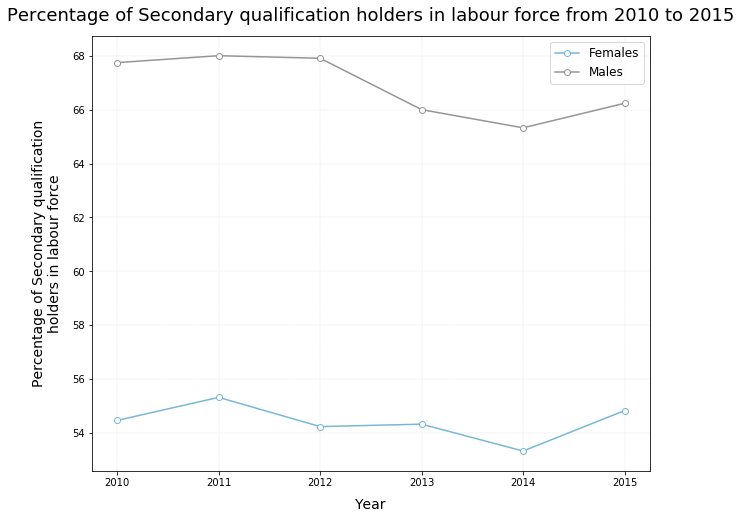

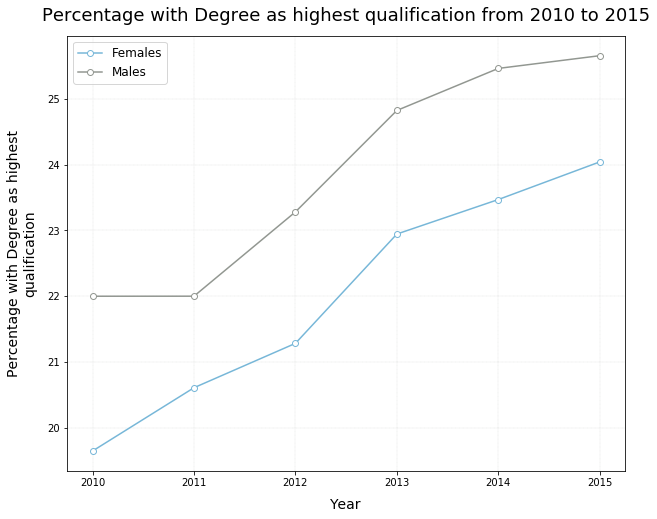

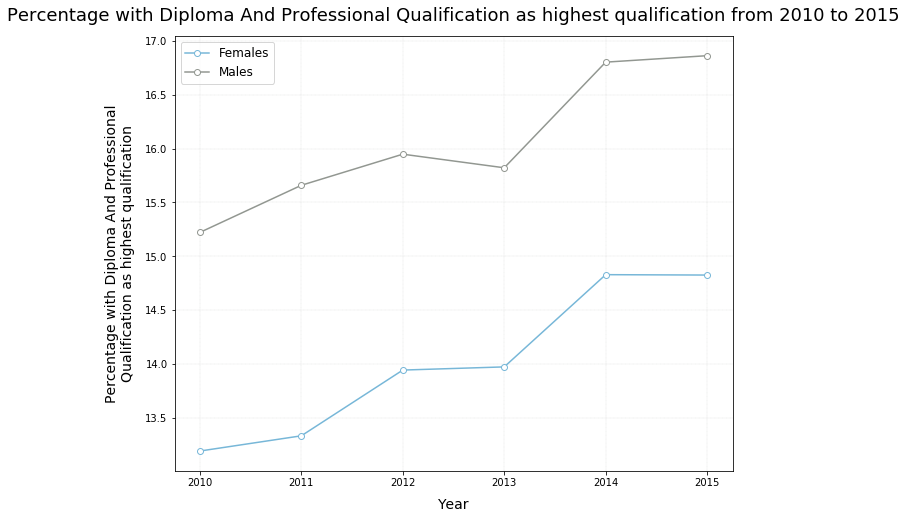

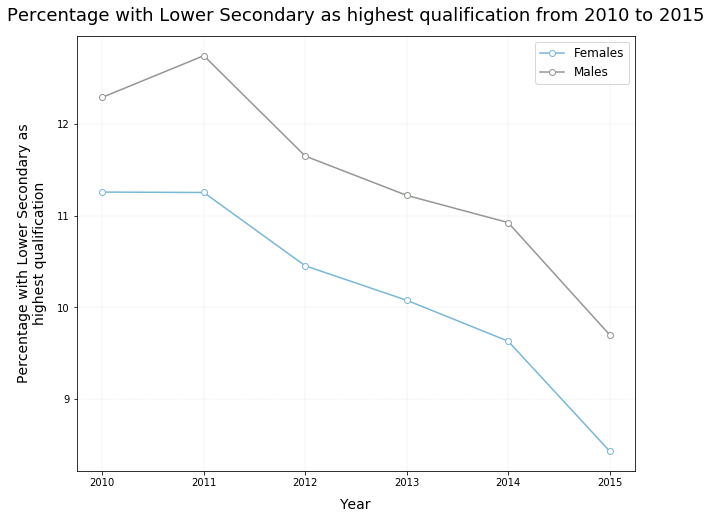

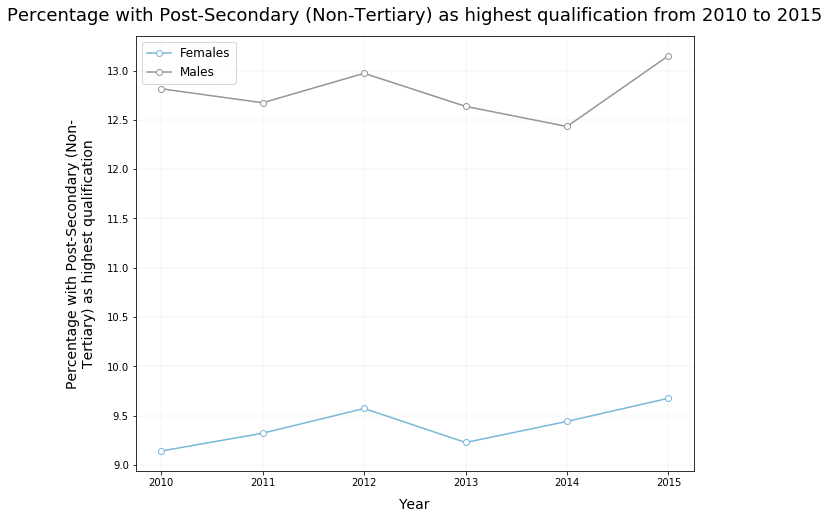

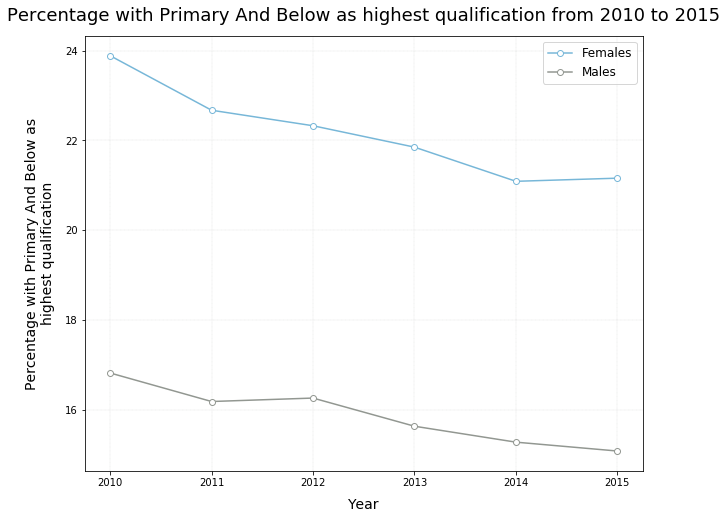

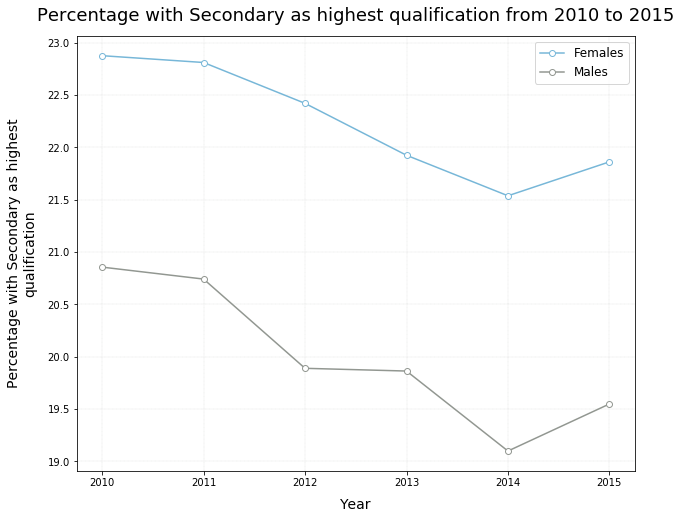

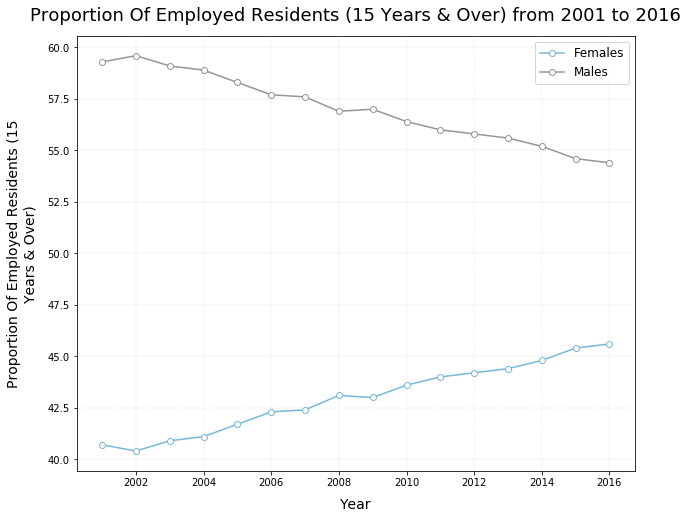

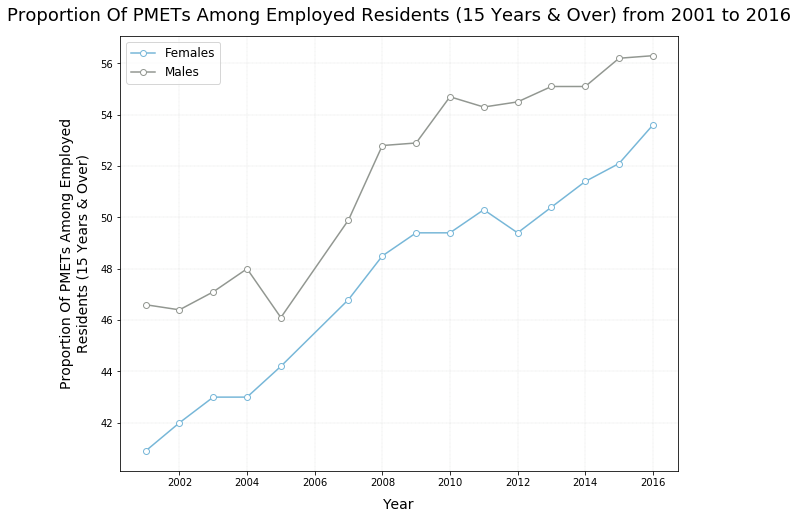

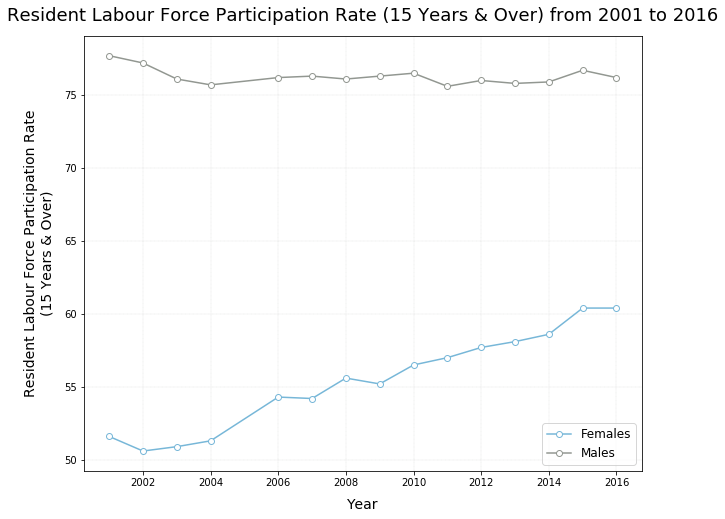

In [19]:
#plot trends for all variables
for variable in np.unique(combined_data['Indicator']):
    trends_linechart(combined_data[combined_data['Indicator']==variable], variable)